In [4]:
import numpy as np
import pandas as pd

In [5]:
model_df = pd.read_pickle("model_data.pkl")

In [34]:
model_df

,Sig. str 1,Sig. str. % 1,Head 1,Body 1,Leg 1,Distance 1,Clinch 1,Ground 1,KD 1,Total str. 1,...,decs 1,kos 2,subs 2,decs 2,lkos 1,lsubs 1,ldecs 1,lkos 2,lsubs 2,ldecs 2
5973,14,35,7,4,3,11,0,3,0,30,...,0,0,0,0,0,0,0,0,0,0
5972,9,56,6,1,2,2,5,2,0,17,...,0,0,0,0,0,0,0,0,0,0
5971,19,55,2,12,5,4,15,0,0,95,...,0,0,0,0,0,0,0,0,0,0
5970,7,53,7,0,0,7,0,0,1,7,...,0,0,0,0,0,0,0,0,0,0
5969,42,31,28,9,5,21,19,2,1,57,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,96,53,44,11,41,85,10,1,0,122,...,5,0,2,5,0,0,1,0,0,2
3,23,92,18,4,1,6,0,17,0,43,...,0,1,0,1,3,1,0,0,0,0
2,44,59,36,7,1,9,17,18,0,112,...,2,2,1,2,1,0,4,0,2,3
1,31,50,21,9,1,28,0,3,0,98,...,0,1,0,1,0,0,1,0,0,3


In [249]:
set(model_df["Rev. 1"])

{0, 1, 2, 3, 4, 5}

In [8]:
#since we cant predict how many strikes and takedowns a fighter will land, we will have to change the features 
#to be aggregated somehow
#a common measure is strikes landed per minute, or takedowns per 15 minutes
#we will probably do everything at a per minute basis, per fight, and for all fighters we will take everything per 
#minute over all their fights
#some features we may need:

#sig strikes per minute (how good fighter is at hitting the other)
sslpm1 = []
sslpm2 = []

#total strikes are probably not that important just because we will have strikes landed on individual
#body parts and at different ranges, so we will not use that, just ti simplify the data slightly
slpm_head1 = []
slpm_head2 = []

slpm_body1 = []
slpm_body2 = []

slpm_leg1 = []
slpm_leg2 = []

slpm_distance1 = []
slpm_distance2 = []

slpm_clinch1 = []
slpm_clinch2 = []

slpm_ground1 = []
slpm_ground2 = []

#significant strikes attempted per minute (even if they don't land, it indicates fighter pressure, 
#and more activity)
ssapm1 = []
ssapm2 = []

#lets look at strike efficiency which we will eventually take an average of
sspercent1 = []
sspercent2 = []

#lets look at knockdowns, important measure for power
kdpm1 = []
kdpm2 = []

#knockdown per significant strike may be a good measure for power too
kdps1 = []
kdps2 = []

#we also need to look at how good a fighter is at defending strikes
#strikes absorbed
sapm1 = []
sapm2 = []

#strikes defended/avoided
sdpm1 = []
sdpm2 = []

#now lets look at grappling stats
tdpm1 = []
tdpm2 = []

#takedown accuracy
tda1 = []
tda2 = []

#just takedowns aren't good if you can't hold the opponent down, maybe we could look at control time per takedown
ctrptd1 = []
ctrptd2 = []

#we will keep control time as is, and keep it as an average across all fighters in their newest data
crt1 = []
ctr2 = []

#control time ratio across whole fight
ctrp1 = []
ctrp2 = []

#even if takedowns don't land they are a good indicator of pressure and can push people to the
#cage, nullifying them, lets track that too
tdapm1 = []
tdapm2 = []

#sub attempts per minute
sbpm1 = []
sbpm2 = []

#sub attempts per takedown, maybe showing how active they are on the ground
sbptd1 = []
sbptd2 = []

#grappling reversals per minute (probably no easy way to measure this)
revpm1 = []
revpm2 = []

#reversals everytime someone gets taken down may be a good measure, maybe they are good of their back
rev_tknd1 = []
rev_tknd2 = []

#lets look at takedown defense as well, percentage would be good here
td1 = []
td2 = []

#now we will keep the stances, heights, weights, wins, losses, wintypes, losstypes as they are

In [122]:
features = pd.DataFrame()

features["sslpm1"] = 60 * model_df["Sig. str 1"]/model_df["time"]
features["sslpm2"] = 60 * model_df["Sig. str 2"]/model_df["time"]

In [123]:
features["slpm_head1"] = 60 * model_df["Head 1"]/model_df["time"]
features["slpm_head2"] = 60 * model_df["Head 2"]/model_df["time"]

features["slpm_body1"] = 60 * model_df["Body 1"]/model_df["time"]
features["slpm_body2"] = 60 * model_df["Body 2"]/model_df["time"]

features["slpm_leg1"] = 60 * model_df["Leg 1"]/model_df["time"]
features["slpm_leg2"] = 60 * model_df["Leg 2"]/model_df["time"]

features["slpm_distance1"] = 60 * model_df["Distance 1"]/model_df["time"]
features["slpm_distance2"] = 60 * model_df["Distance 2"]/model_df["time"]

features["slpm_clinch1"] = 60 * model_df["Clinch 1"]/model_df["time"]
features["slpm_clinch2"] = 60 * model_df["Clinch 2"]/model_df["time"]

features["slpm_ground1"] = 60 * model_df["Ground 1"]/model_df["time"]
features["slpm_ground2"] = 60 * model_df["Ground 2"]/model_df["time"]

In [124]:
features["ssapm1"] = 60 * model_df["Sig. str attempted1"]/model_df["time"]
features["ssapm2"] = 60 * model_df["Sig. str attempted2"]/model_df["time"]

In [125]:
features["sspercent1"] = model_df["Sig. str. % 1"]
features["sspercent2"] = model_df["Sig. str. % 2"]

In [126]:
features["kdpm1"] = 60 * model_df["KD 1"]/model_df["time"]
features["kdpm2"] = 60 * model_df["KD 2"]/model_df["time"]

In [127]:
# features["kdps1"] = model_df["KD 1"]/model_df["Sig. str 1"]
# features["kdps2"] = model_df["KD 2"]/model_df["Sig. str 2"]

In [128]:
features["sapm1"] = 60 * model_df["Sig. str absorbed1"]/model_df["time"]
features["sapm2"] = 60 * model_df["Sig. str absorbed2"]/model_df["time"]

In [129]:
features["sdpm1"] = 60 * model_df["Sig. str defended1"]/model_df["time"]
features["sdpm2"] = 60 * model_df["Sig. str defended2"]/model_df["time"]

In [130]:
features["tdpm1"] = 60 * model_df["Td 1"]/model_df["time"]
features["tdpm2"] = 60 * model_df["Td 2"]/model_df["time"]

In [131]:
features["tdam1"] = 60 * model_df["Td attempted 1"]/model_df["time"]
features["tdam2"] = 60 * model_df["Td attempted 2"]/model_df["time"]

In [132]:
features["tda1"] = model_df["Td % 1"]
features["tda2"] = model_df["Td % 2"]

In [133]:
# features["ctrptd1"] = model_df["Ctrl 1"]/model_df["Td 1"]
# features["ctrptd2"] = model_df["Ctrl 2"]/model_df["Td 2"]

In [134]:
features["ctr1"] = model_df["Ctrl 1"]
features["ctr2"] = model_df["Ctrl 2"]

In [135]:
# features["ctrp1"] = model_df["Ctrl 1"]/model_df["time"]
# features["ctrp2"] = model_df["Ctrl 2"]/model_df["time"]

In [136]:
features["sbpm1"] = 60 * model_df["Sub. att 1"]/model_df["time"]
features["sbpm2"] = 60 * model_df["Sub. att 2"]/model_df["time"]

In [137]:
# features["sbptd1"] = model_df["Sub. att 1"]/model_df["Td 1"]
# features["sbptd2"] = model_df["Sub. att 2"]/model_df["Td 2"]

In [138]:
features["revpm1"] = 60 * model_df["Rev. 1"]/model_df["time"]
features["revpm2"] = 60 * model_df["Rev. 2"]/model_df["time"]

In [139]:
# features["rev_tknd1"] = model_df["Rev. 1"]/model_df["Td 2"]
# features["rev_tknd2"] = model_df["Rev. 2"]/model_df["Td 1"]

In [140]:
# features["tdd1"] = model_df["tdd1"]/model_df["Td attempted 2"]
# features["tdd2"] = model_df["tdd2"]/model_df["Td attempted 1"]

In [141]:
features["Height1"] = model_df["Height 1"]
features["Height2"] = model_df["Height 2"]

In [142]:
features["Weight1"] = model_df["Weight 1"]
features["Weight2"] = model_df["Weight 2"]

In [143]:
features["Stance 1_Open"] = model_df["Stance 1_Open"]
features["Stance 1_Orthodox"] = model_df["Stance 1_Orthodox"]
features["Stance 1_Southpaw"] = model_df["Stance 1_Southpaw"]
features["Stance 1_Switch"] = model_df["Stance 1_Switch"]
features["Stance 1_Sideways"] = model_df["Stance 1_Sideways"]

features["Stance 2_Open"] = model_df["Stance 2_Open"]
features["Stance 2_Orthodox"] = model_df["Stance 2_Orthodox"]
features["Stance 2_Southpaw"] = model_df["Stance 2_Southpaw"]
features["Stance 2_Switch"] = model_df["Stance 2_Switch"]
features["Stance 2_Sideways"] = model_df["Stance 2_Sideways"]

In [144]:
features["Wins 1"] = model_df["Wins 1"]
features["Losses 1"] = model_df["Losses 1"]

features["Wins 2"] = model_df["Wins 2"]
features["Losses 2"] = model_df["Losses 2"]

In [145]:
features["kos1"] = model_df["kos 1"]
features["subs1"] = model_df["subs 1"]
features["decs1"] = model_df["decs 1"]

features["lkos1"] = model_df["lkos 1"]
features["lsubs1"] = model_df["lsubs 1"]
features["ldecs1"] = model_df["ldecs 1"]

In [146]:
features["kos2"] = model_df["kos 2"]
features["subs2"] = model_df["subs 2"]
features["decs2"] = model_df["decs 2"]

features["lkos2"] = model_df["lkos 2"]
features["lsubs2"] = model_df["lsubs 2"]
features["ldecs2"] = model_df["ldecs 2"]

In [147]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5865 entries, 5973 to 0
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sslpm1             5865 non-null   float64
 1   sslpm2             5865 non-null   float64
 2   slpm_head1         5865 non-null   float64
 3   slpm_head2         5865 non-null   float64
 4   slpm_body1         5865 non-null   float64
 5   slpm_body2         5865 non-null   float64
 6   slpm_leg1          5865 non-null   float64
 7   slpm_leg2          5865 non-null   float64
 8   slpm_distance1     5865 non-null   float64
 9   slpm_distance2     5865 non-null   float64
 10  slpm_clinch1       5865 non-null   float64
 11  slpm_clinch2       5865 non-null   float64
 12  slpm_ground1       5865 non-null   float64
 13  slpm_ground2       5865 non-null   float64
 14  ssapm1             5865 non-null   float64
 15  ssapm2             5865 non-null   float64
 16  sspercent1         5865 

In [50]:
#all the null values are due to divisions by 0, we will replace those values ith 0
features = features.fillna(0)

In [52]:
#lets get the target
target = model_df["result"]

In [54]:
set(target)

{0, 1}

In [7]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5865 entries, 5973 to 0
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sig. str 1           5865 non-null   int64  
 1   Sig. str. % 1        5865 non-null   int64  
 2   Head 1               5865 non-null   int64  
 3   Body 1               5865 non-null   int64  
 4   Leg 1                5865 non-null   int64  
 5   Distance 1           5865 non-null   int64  
 6   Clinch 1             5865 non-null   int64  
 7   Ground 1             5865 non-null   int64  
 8   KD 1                 5865 non-null   int64  
 9   Total str. 1         5865 non-null   int64  
 10  Td 1                 5865 non-null   int64  
 11  Td % 1               5865 non-null   float64
 12  Sub. att 1           5865 non-null   int64  
 13  Rev. 1               5865 non-null   int64  
 14  Ctrl 1               5865 non-null   int64  
 15  Sig. str 2           5865 non-null   i

In [72]:
#check for inifinities
d = np.isfinite(features)
d

,sslpm1,sslpm2,slpm_head1,slpm_head2,slpm_body1,slpm_body2,slpm_leg1,slpm_leg2,slpm_distance1,slpm_distance2,...,lsubs1,ldecs1,kos2,subs2,decs2,lkos2,lsubs2,ldecs2,tdd1,tdd2
5973,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5972,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5971,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5970,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5969,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [71]:
for c in d.columns:
    if len(set(d[c])) > 1:
        print(c)

ctrptd1
ctrptd2
sbptd1
sbptd2
rev_tknd1
rev_tknd2


In [98]:
d = np.isfinite(features2)
for c in d.columns:
    if len(set(d[c])) > 1:
        print(c)

In [99]:
d = np.isnan(features2)
for c in d.columns:
    if len(set(d[c])) > 1:
        print(c)

In [96]:
features2 = features.drop("ctrptd1", axis=1)
features2 = features2.drop("ctrptd2", axis=1)
features2 = features2.drop("sbptd1", axis=1)
features2 = features2.drop("sbptd2", axis=1)
features2 = features2.drop("rev_tknd1", axis=1)
features2 = features2.drop("rev_tknd2", axis=1)

In [255]:
features.to_pickle("features.pkl")

In [252]:
target = pd.DataFrame(target)


,result
4842,0
4837,0
4835,0
4833,0
4832,0
...,...
10,0
9,0
6,0
1,0


In [256]:
target.to_pickle("target.pkl")

In [56]:
from sklearn.linear_model import LogisticRegression

In [239]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=69420)

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [242]:
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
ypred_train = logreg.predict(X_train)
#print(accuracy_score(y_train, ypred_train))
ypred = logreg.predict(X_test)
print(accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred))
print(precision_score(y_test, ypred))
print(recall_score(y_test, ypred))

0.8815004262574595
0.9120809614168248
0.8901234567901235
0.9351491569390402


In [155]:
from sklearn.tree import DecisionTreeClassifier

logreg = DecisionTreeClassifier().fit(X_train, y_train)
ypred_train = logreg.predict(X_train)
print(accuracy_score(y_train, ypred_train))
ypred = logreg.predict(X_test)
print(accuracy_score(y_test, ypred))

1.0
0.8209718670076727


In [156]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

text_representation = tree.export_text(logreg)
print(text_representation)

|--- feature_12 <= 0.23
|   |--- feature_13 <= 0.17
|   |   |--- feature_1 <= 3.60
|   |   |   |--- feature_33 <= 0.20
|   |   |   |   |--- feature_20 <= 3.25
|   |   |   |   |   |--- feature_1 <= 2.00
|   |   |   |   |   |   |--- feature_31 <= 393.50
|   |   |   |   |   |   |   |--- feature_19 <= 0.02
|   |   |   |   |   |   |   |   |--- feature_27 <= 1.10
|   |   |   |   |   |   |   |   |   |--- feature_31 <= 233.50
|   |   |   |   |   |   |   |   |   |   |--- feature_52 <= 17.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_52 >  17.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- feature_31 >  233.50
|   |   |   |   |   |   |   |   |   |   |--- feature_31 <= 267.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_31 >  267.50
|   |   |   |   |   |   |   |   |   |   | 

In [157]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import 

logreg = GaussianNB().fit(X_train, y_train)
ypred_train = logreg.predict(X_train)
print(accuracy_score(y_train, ypred_train))
ypred = logreg.predict(X_test)
print(accuracy_score(y_test, ypred))

0.7896419437340153
0.7800511508951407


In [173]:
from sklearn.ensemble import RandomForestClassifier

logreg = RandomForestClassifier().fit(X_train, y_train)
ypred_train = logreg.predict(X_train)
print(accuracy_score(y_train, ypred_train))
ypred = logreg.predict(X_test)
print(accuracy_score(y_test, ypred))

1.0
0.8772378516624041


/Users/vaibhavguglani/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


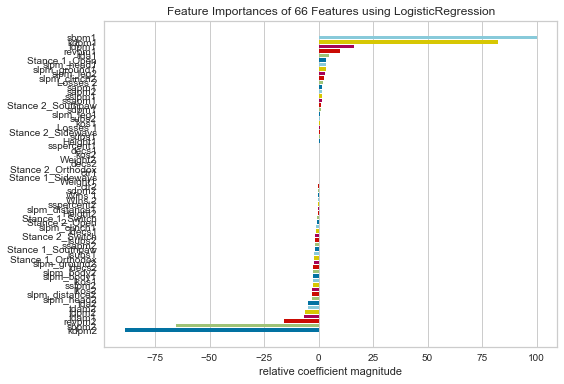

<AxesSubplot:title={'center':'Feature Importances of 66 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [175]:

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X, y = features, target

model = LogisticRegression(solver='liblinear')
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

In [184]:
viz.features_

array(['kdpm2', 'sbpm2', 'revpm2', 'tdam1', 'tdpm2', 'tdam2', 'tda2',
       'slpm_head2', 'slpm_distance2', 'lkos2', 'sslpm2', 'lkos1',
       'slpm_body1', 'slpm_body2', 'ldecs2', 'slpm_ground2',
       'Stance 1_Orthodox', 'lsubs1', 'Stance 1_Southpaw', 'ssapm2',
       'lsubs2', 'Stance 2_Switch', 'ldecs1', 'slpm_clinch1',
       'Stance 2_Open', 'Stance 1_Switch', 'Height2', 'slpm_distance1',
       'sspercent2', 'Wins 2', 'Wins 1', 'sdpm2', 'ctr2', 'Weight1',
       'Stance 1_Sideways', 'ctr1', 'Stance 2_Orthodox', 'decs2',
       'Weight2', 'kos2', 'decs1', 'sspercent1', 'Height1', 'subs1',
       'Stance 2_Sideways', 'Losses 1', 'kos1', 'subs2', 'slpm_leg1',
       'sdpm1', 'Stance 2_Southpaw', 'ssapm1', 'sslpm1', 'sapm2', 'sapm1',
       'Losses 2', 'slpm_clinch2', 'slpm_leg2', 'slpm_ground1',
       'slpm_head1', 'Stance 1_Open', 'tda1', 'revpm1', 'tdpm1', 'kdpm1',
       'sbpm1'], dtype=object)

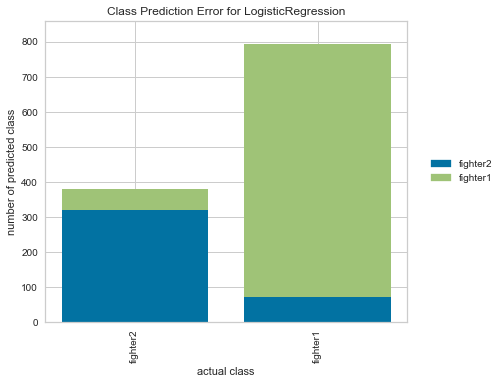

<AxesSubplot:title={'center':'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.datasets import load_credit


classes = ['fighter2', 'fighter1']


# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    LogisticRegression(solver='liblinear'), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()



In [199]:
from sklearn.ensemble import AdaBoostClassifier

logreg = AdaBoostClassifier().fit(X_train, y_train)
ypred_train = logreg.predict(X_train)
print(accuracy_score(y_train, ypred_train))
ypred = logreg.predict(X_test)
print(accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred))
print(precision_score(y_test, ypred))
print(recall_score(y_test, ypred))


0.888533674339301
0.875532821824382
0.9070063694267515
0.9024081115335868
0.911651728553137


In [188]:
target[target==0]

4842    0
4837    0
4835    0
4833    0
4832    0
       ..
10      0
9       0
6       0
1       0
0       0
Name: result, Length: 1973, dtype: int64

In [189]:
len(target)

5865